# Dealing with Outliers

Sometimes outliers can mess up an analysis; you usually don't want a handful of data points to skew the overall results. Let's revisit our example of income data, with some random billionaire thrown in:

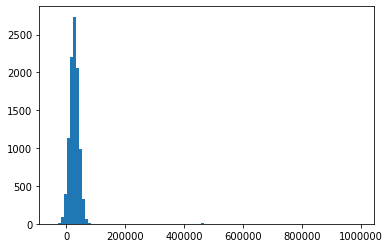

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

incomes = np.random.normal(27000, 15000, 10000)
outliers = np.random.randint(0, 1000000, 100)
incomes = np.append(incomes, outliers)

plt.hist(incomes,100)
plt.show()

That's not very helpful to look at. One billionaire ended up squeezing everybody else into a single line in my histogram. Plus it skewed my mean income significantly:

In [75]:
incomes.mean()

31415.44076824877

It's important to dig into what is causing your outliers, and understand where they are coming from. You also need to think about whether removing them is a valid thing to do, given the spirit of what it is you're trying to analyze. If I know I want to understand more about the incomes of "typical Americans", filtering out billionaires seems like a legitimate thing to do.

Here's something a little more robust than filtering out billionaires - it filters out anything beyond two standard deviations of the median value in the data set:

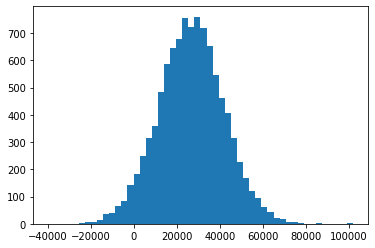

In [76]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    return [e for e in data if (u - 2 * s < e < u + 2 * s)]

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

That looks better. And, our mean is more, well, meangingful now as well:

In [77]:
np.mean(filtered)

26739.74822841148

## Activity

Instead of a single outlier, add several randomly-generated outliers to the data. Experiment with different values of the multiple of the standard deviation to identify outliers, and see what effect it has on the final results.